In [3]:
import numpy as np
from pvanalysis import PVAnalysis

'-------- INPUTS --------'
fitsfile = './testfits/test.fits'
outname = 'pvanalysis'  # file name header for outputs
incl = 48.  # deg
vsys = 6.4  # km/s
dist = 140.  # pc
rms = 1.7e-3  # Jy/beam
thr = 5.  # rms
ridgemode = 'mean'  # 'mean' or 'gauss'
xlim = [-200, 0, 0, 200]  # au; [-outlim, -inlim, inlim, outlim]
vlim = np.array([-5, 0, 0, 5]) + vsys  # km/s
Mlim = [0, 10]  # M_sun; to exclude unreasonable points
xlim_plot = [200. / 20., 200.]  # au; [inlim, outlim]
vlim_plot = [6. / 20., 6.]  # km/s
use_velocity = True  # cuts along the velocity direction
use_position = True  # cuts along the positional direction
include_vsys = False  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = False  # False means pin=0.5 (Keplerian).
fixed_pin = 0.5  # Fixed pin when include_pin is False.
fixed_dp = 0.0  # Fixed dp when include_dp is False.
show_pv = True  # figures will be made regardless of this option.
show_corner = True  # figures will be made regardless of this option.
minabserr = 0.1  # minimum absolute errorbar in the unit of bmaj or dv.
minrelerr = 0.01  # minimum relative errorbar.
'------------------------'


# Get edge/ridge
impv = PVAnalysis(fitsfile, rms, vsys, dist, incl=incl, pa=None)
impv.get_edgeridge(outname, thr=thr, ridgemode=ridgemode,
                   use_position=use_position, use_velocity=use_velocity,
                   Mlim=Mlim, xlim=np.array(xlim) / dist, vlim=vlim,
                   minabserr=minabserr, minrelerr=minrelerr,
                   nanbeforemax=True, nanopposite=True, nanbeforecross=True)
impv.write_edgeridge(outname=outname)

read_pvfits: No PA information is given.
read_pvfits: Convert frequency to velocity
Along position axis.
x range: -1.42 -- 1.42 arcsec
v range: 1.75 -- 11.20 km/s
Along velocity axis.
x range: -1.42 -- 1.42 arcsec
v range: 1.75 -- 11.20 km/s
Derived points in pvanalysis.edge.dat and pvanalysis.ridge.dat.


## Comparison between emcee and dynesty

Single power with free vsys.

EMCEE


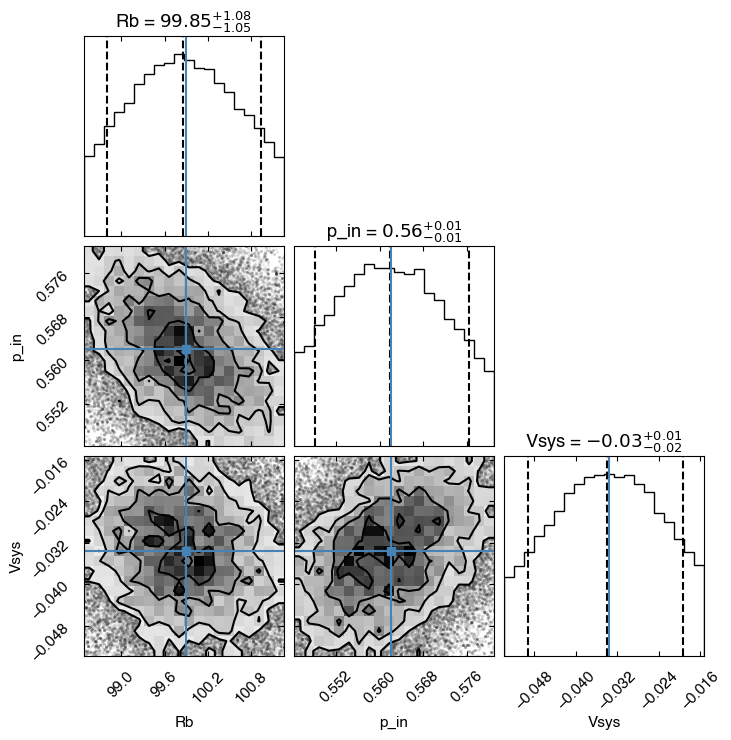

Evidence: 6.36e-26 +/- 5.87e-27
[edge]


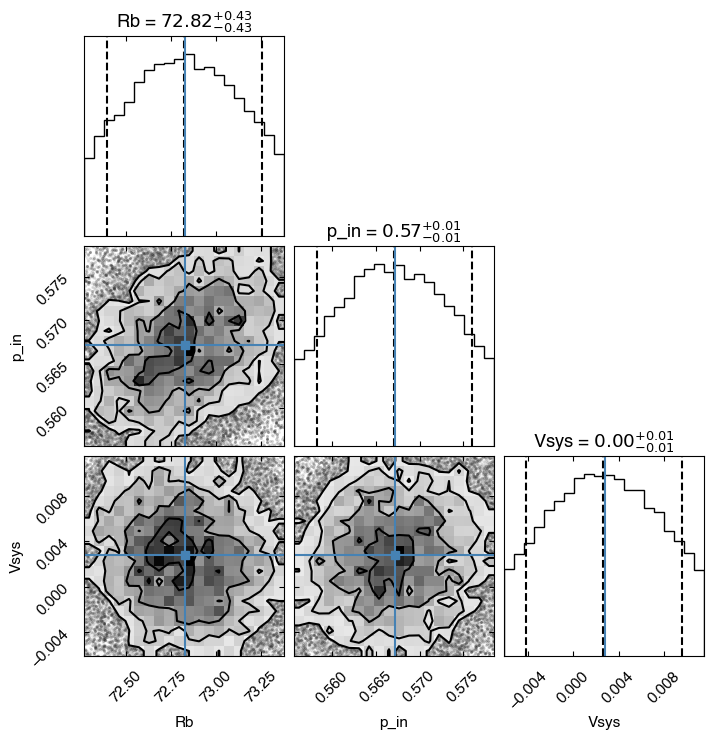

Evidence: 8.92e-54 +/- 8.86e-55
[ridge]
Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 99.85 +/- 1.06 au
!!! Rb is NOT a break (disk) radius in the single-power fitting. !!!
V_b   = 2.400 +/- 0.000 km/s
!!! Vb is a middle velocity in the single-power fitting. !!!
p_in  = 0.562 +/- 0.014
dp    = 0.000 +/- 0.000
v_sys = 6.366 +/- 0.015
r     = 37.94 --- 185.50 au
v     = 1.660 --- 4.100 km/s
M_in  = 1.323 +/- 0.036 Msun
M_out = 1.087 +/- 0.031 Msun
M_b   = 1.174 +/- 0.013 Msun
--- Ridge ---
R_b   = 72.82 +/- 0.43 au
!!! Rb is NOT a break (disk) radius in the single-power fitting. !!!
V_b   = 2.412 +/- 0.000 km/s
!!! Vb is a middle velocity in the single-power fitting. !!!
p_in  = 0.567 +/- 0.009
dp    = 0.000 +/- 0.000
v_sys = 6.403 +/- 0.007
r     = 30.55 --- 157.50 au
v     = 1.560 --- 3.950 km/s
M_in  = 0.972 +/- 0.015 Msun
M_out = 0.780 +/- 0.014 Msun
M_b   = 0.865 +/- 0.005 Msun

DYNESTY


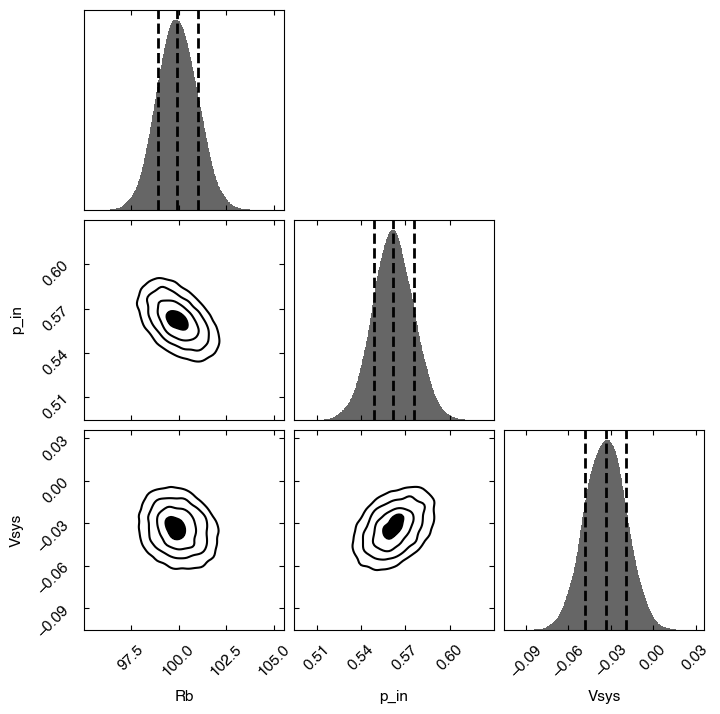

Evidence: 8.50e-26 +/- 7.82e-27
[edge]


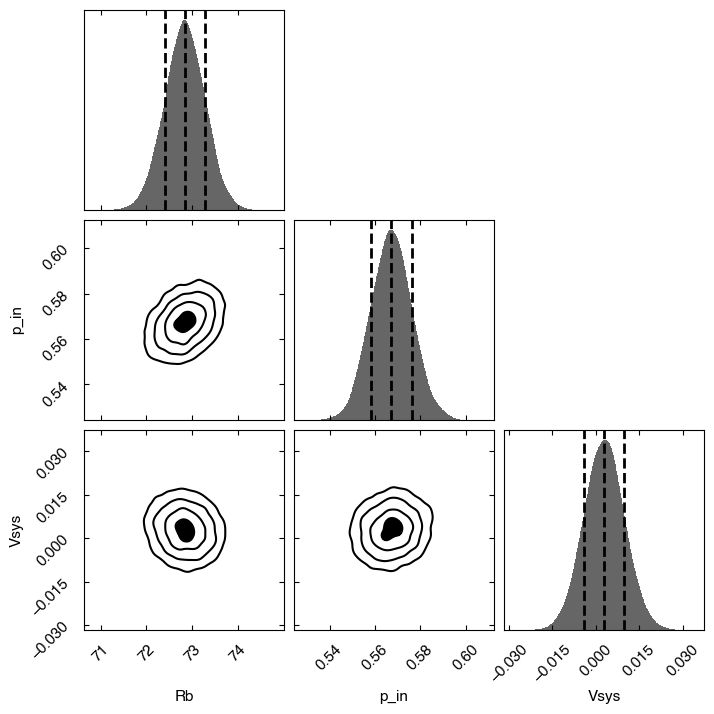

Evidence: 1.20e-53 +/- 1.19e-54
[ridge]
Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 99.93 +/- 1.05 au
!!! Rb is NOT a break (disk) radius in the single-power fitting. !!!
V_b   = 2.400 +/- 0.000 km/s
!!! Vb is a middle velocity in the single-power fitting. !!!
p_in  = 0.562 +/- 0.013
dp    = 0.000 +/- 0.000
v_sys = 6.367 +/- 0.014
r     = 37.94 --- 185.50 au
v     = 1.660 --- 4.100 km/s
M_in  = 1.323 +/- 0.035 Msun
M_out = 1.086 +/- 0.029 Msun
M_b   = 1.175 +/- 0.012 Msun
--- Ridge ---
R_b   = 72.84 +/- 0.43 au
!!! Rb is NOT a break (disk) radius in the single-power fitting. !!!
V_b   = 2.412 +/- 0.000 km/s
!!! Vb is a middle velocity in the single-power fitting. !!!
p_in  = 0.567 +/- 0.009
dp    = 0.000 +/- 0.000
v_sys = 6.403 +/- 0.007
r     = 30.55 --- 157.50 au
v     = 1.560 --- 3.950 km/s
M_in  = 0.972 +/- 0.015 Msun
M_out = 0.780 +/- 0.014 Msun
M_b   = 0.865 +/- 0.005 Msun


In [4]:
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = False  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
fixed_pin = 0.5  # Fixed pin when include_pin is False.
fixed_dp = 0.0  # Fixed dp when include_dp is False.

print('EMCEE')
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
print('\nDYNESTY')
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner, with_dynesty=True)
impv.output_fitresult()

Double power with fixed vsys.

EMCEE


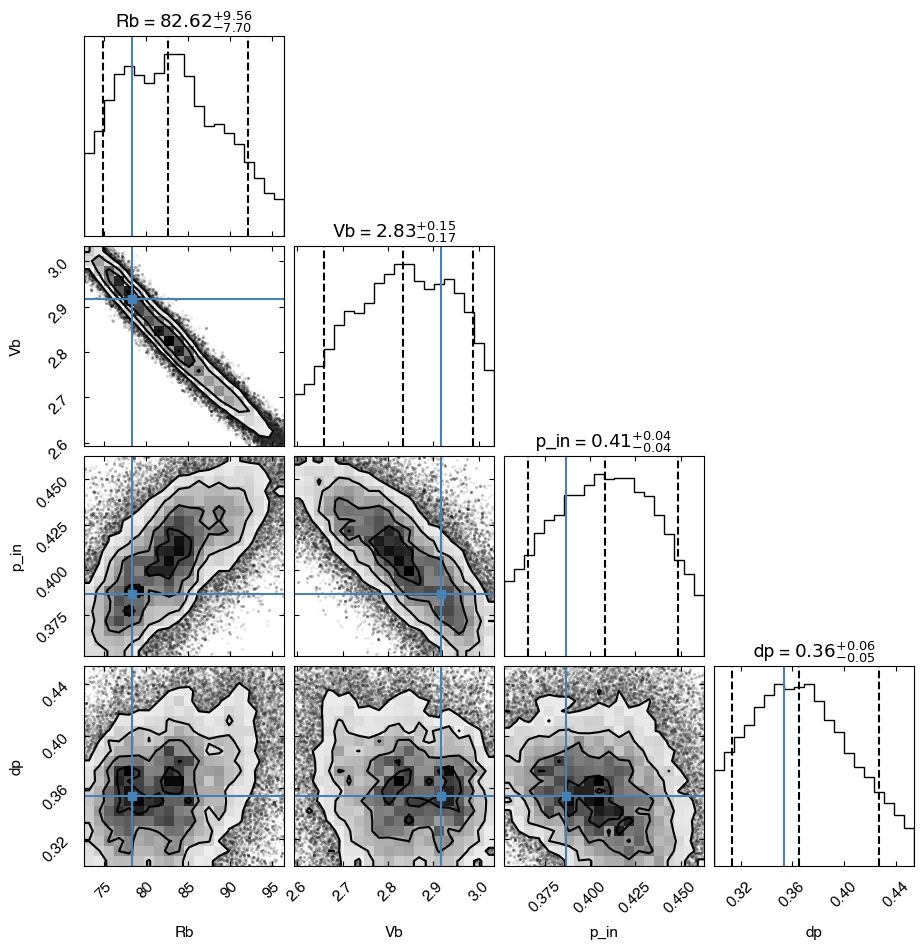

Evidence: 7.01e-16 +/- 7.00e-17
[edge]


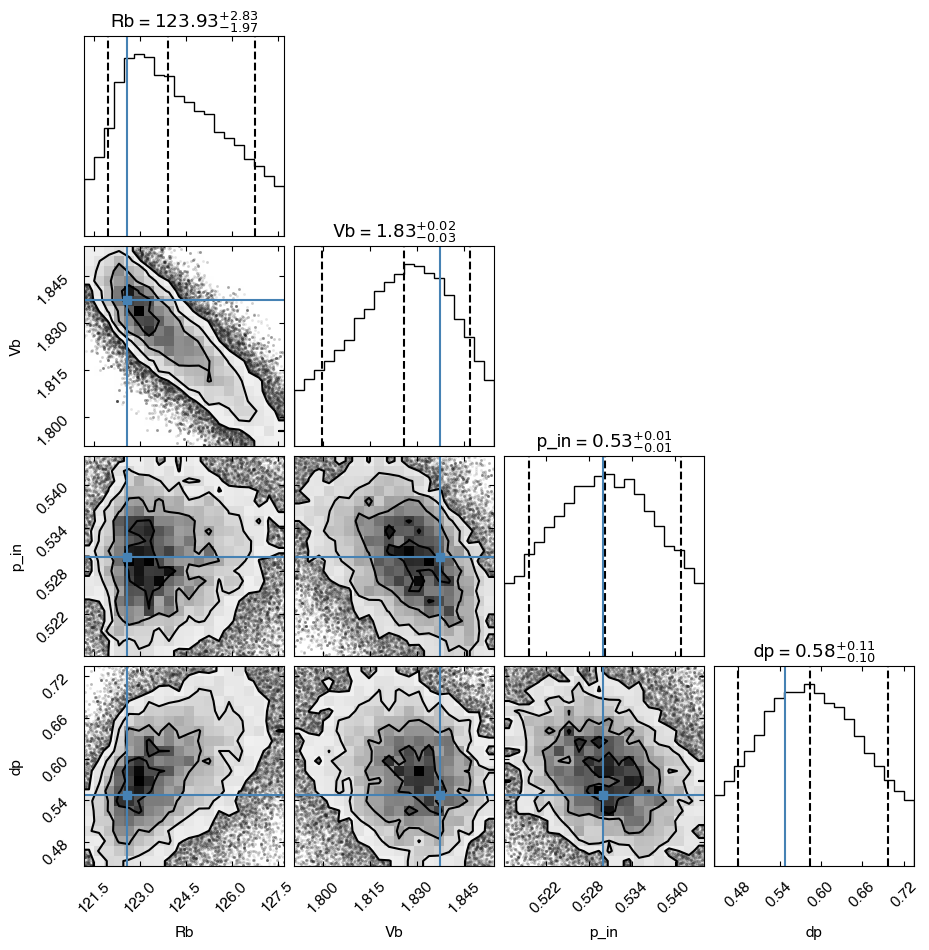

Evidence: 3.56e-42 +/- 4.00e-43
[ridge]
Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 82.62 +/- 8.63 au
V_b   = 2.833 +/- 0.163 km/s
p_in  = 0.408 +/- 0.041
dp    = 0.365 +/- 0.057
v_sys = 6.400 +/- 0.000
r     = 37.94 --- 185.50 au
v     = 1.660 --- 4.100 km/s
M_in  = 1.302 +/- 0.227 Msun
M_out = 1.044 +/- 0.218 Msun
M_b   = 1.353 +/- 0.210 Msun
--- Ridge ---
R_b   = 123.93 +/- 2.40 au
V_b   = 1.826 +/- 0.024 km/s
p_in  = 0.530 +/- 0.011
dp    = 0.584 +/- 0.109
v_sys = 6.400 +/- 0.000
r     = 30.55 --- 157.50 au
v     = 1.560 --- 3.950 km/s
M_in  = 0.973 +/- 0.039 Msun
M_out = 0.783 +/- 0.051 Msun
M_b   = 0.843 +/- 0.027 Msun

DYNESTY


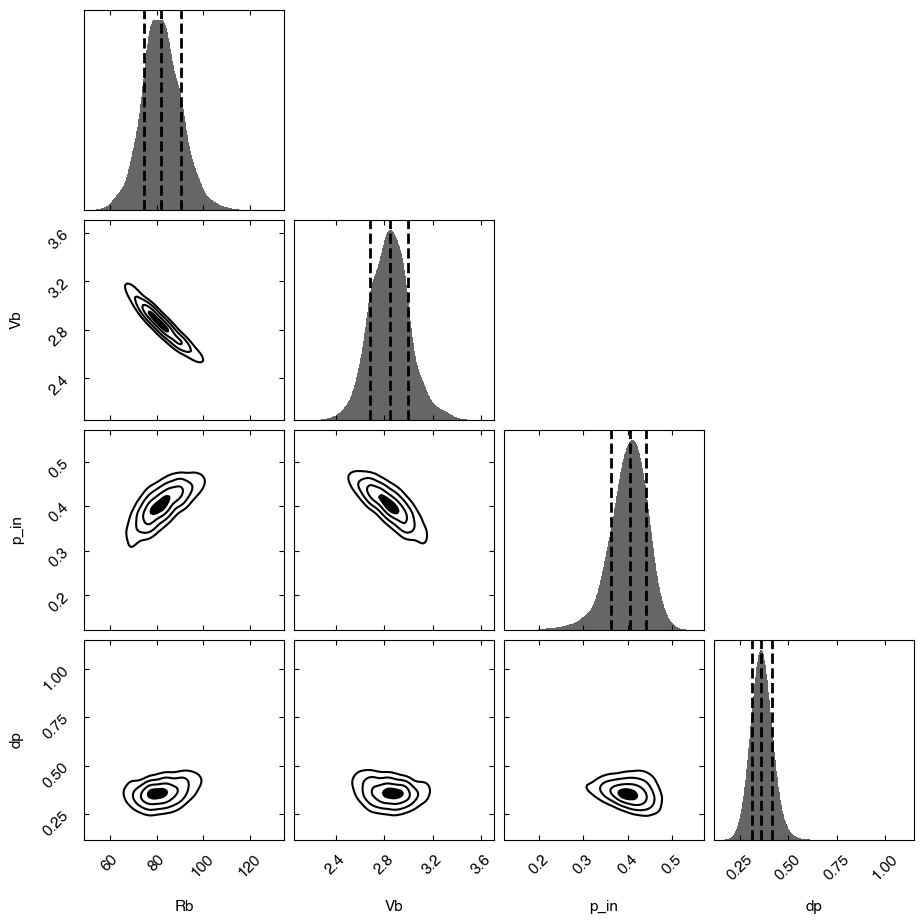

Evidence: 8.27e-16 +/- 8.25e-17
[edge]


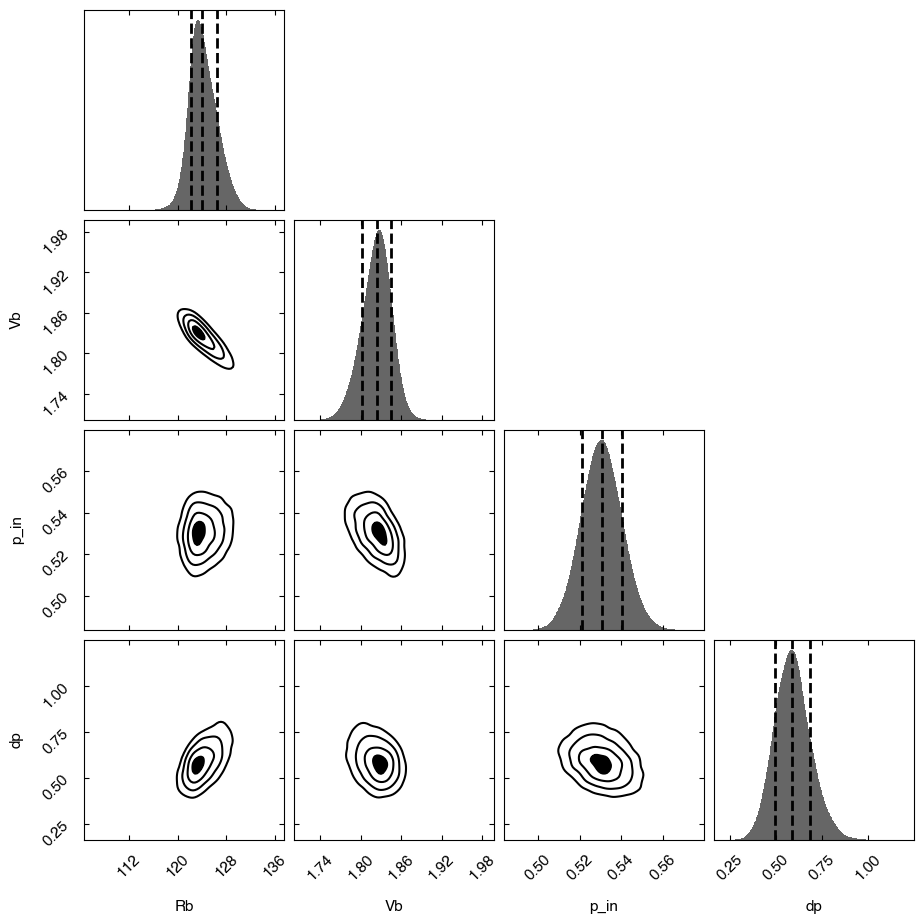

Evidence: 4.00e-42 +/- 4.30e-43
[ridge]
Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 81.92 +/- 8.00 au
V_b   = 2.848 +/- 0.154 km/s
p_in  = 0.405 +/- 0.040
dp    = 0.362 +/- 0.051
v_sys = 6.400 +/- 0.000
r     = 37.94 --- 185.50 au
v     = 1.660 --- 4.100 km/s
M_in  = 1.302 +/- 0.214 Msun
M_out = 1.044 +/- 0.204 Msun
M_b   = 1.356 +/- 0.198 Msun
--- Ridge ---
R_b   = 124.01 +/- 2.17 au
V_b   = 1.825 +/- 0.021 km/s
p_in  = 0.530 +/- 0.010
dp    = 0.585 +/- 0.095
v_sys = 6.400 +/- 0.000
r     = 30.55 --- 157.50 au
v     = 1.560 --- 3.950 km/s
M_in  = 0.973 +/- 0.035 Msun
M_out = 0.783 +/- 0.045 Msun
M_b   = 0.843 +/- 0.025 Msun


In [6]:
include_vsys = False  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
fixed_pin = 0.5  # Fixed pin when include_pin is False.
fixed_dp = 0.0  # Fixed dp when include_dp is False.

print('EMCEE')
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
print('\nDYNESTY')
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner, with_dynesty=True)
impv.output_fitresult()

Double power with free vsys.

EMCEE


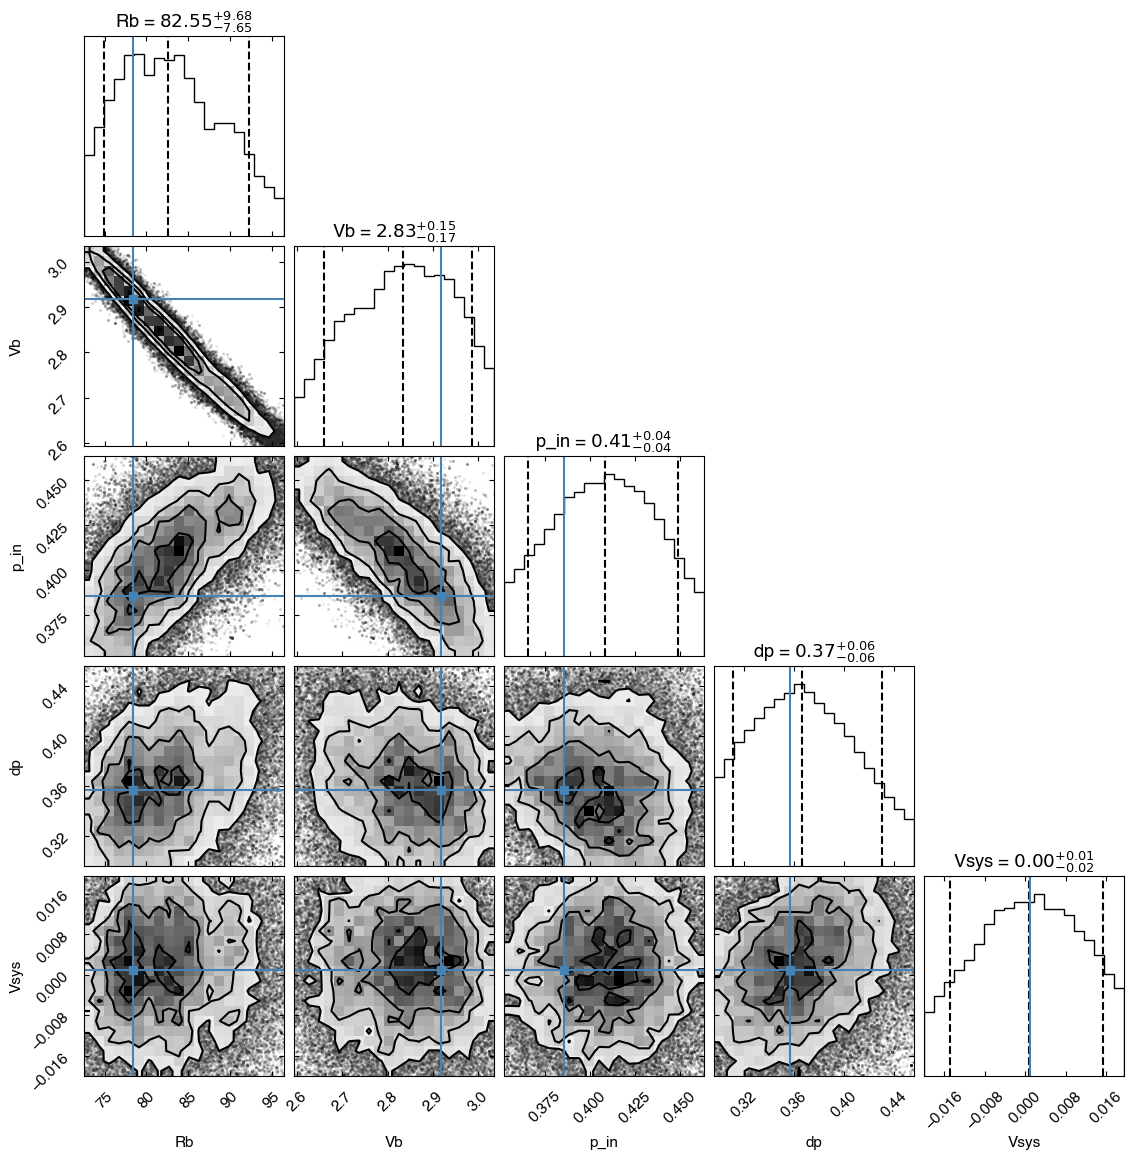

Evidence: 1.14e-17 +/- 1.43e-18
[edge]


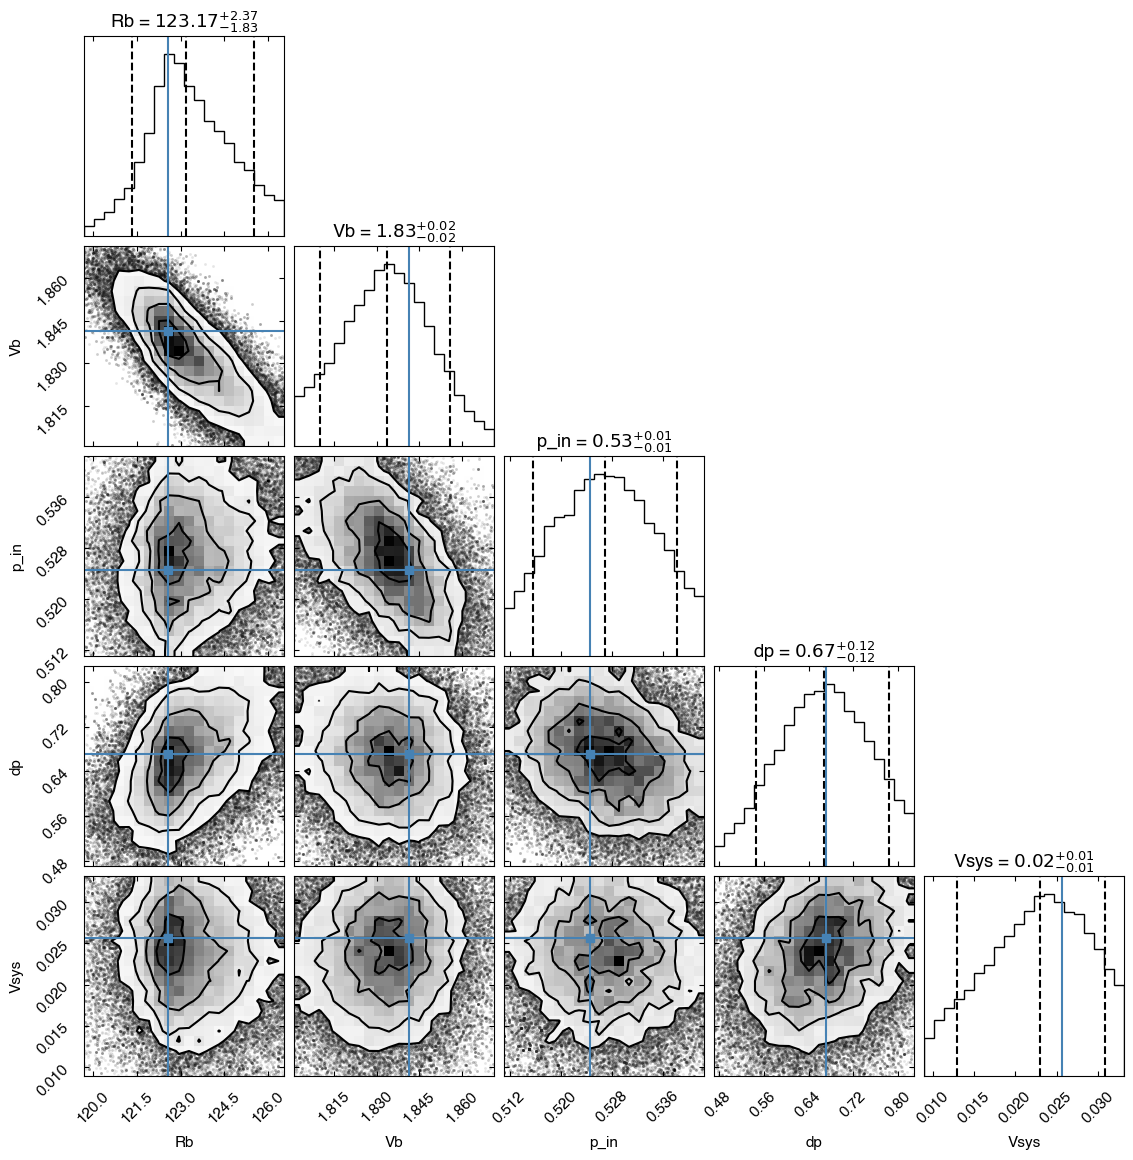

Evidence: 1.09e-41 +/- 1.45e-42
[ridge]
Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 82.55 +/- 8.67 au
V_b   = 2.834 +/- 0.163 km/s
p_in  = 0.408 +/- 0.042
dp    = 0.367 +/- 0.059
v_sys = 6.401 +/- 0.015
r     = 37.94 --- 185.50 au
v     = 1.660 --- 4.100 km/s
M_in  = 1.301 +/- 0.228 Msun
M_out = 1.043 +/- 0.221 Msun
M_b   = 1.353 +/- 0.211 Msun
--- Ridge ---
R_b   = 123.17 +/- 2.10 au
V_b   = 1.834 +/- 0.023 km/s
p_in  = 0.527 +/- 0.011
dp    = 0.667 +/- 0.118
v_sys = 6.423 +/- 0.009
r     = 30.55 --- 157.50 au
v     = 1.560 --- 3.950 km/s
M_in  = 0.962 +/- 0.039 Msun
M_out = 0.760 +/- 0.051 Msun
M_b   = 0.845 +/- 0.025 Msun

DYNESTY


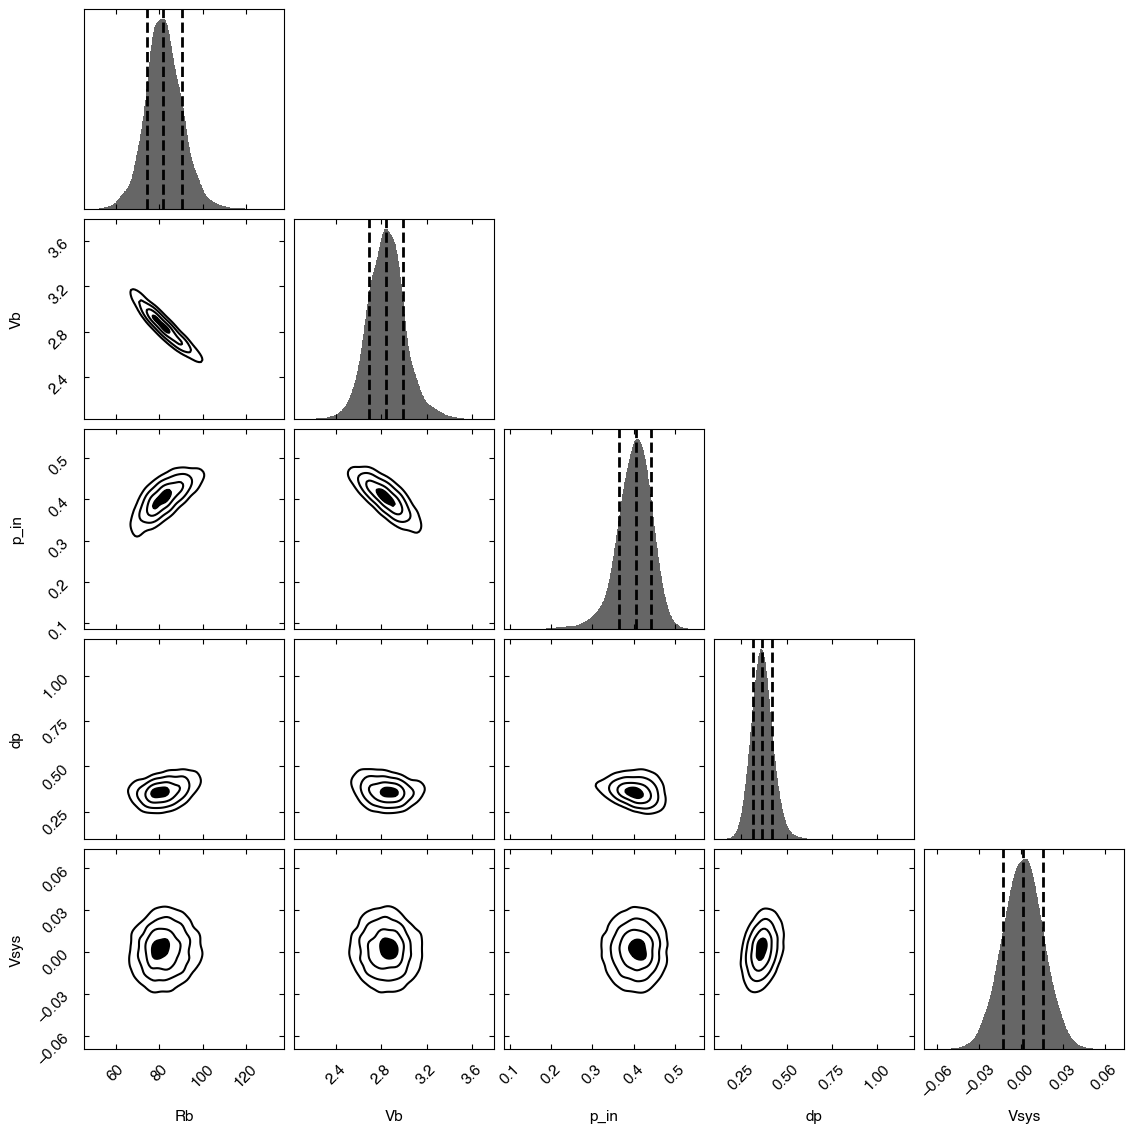

Evidence: 1.24e-17 +/- 1.53e-18
[edge]


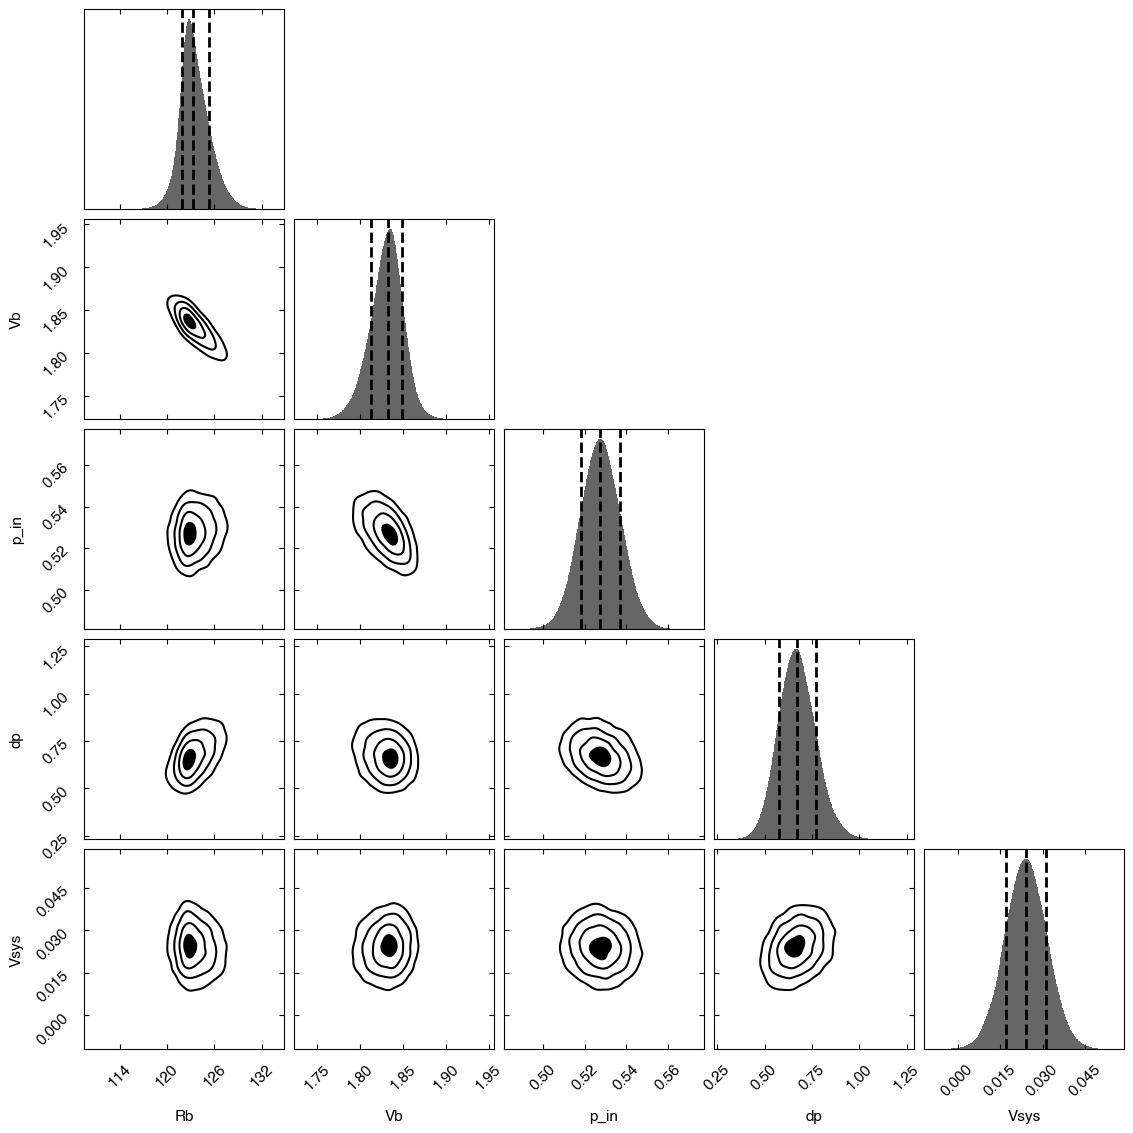

Evidence: 9.58e-42 +/- 1.18e-42
[ridge]
Corner plots in pvanalysis.corner_e.png and pvanalysis.corner_r.png
--- Edge ---
R_b   = 81.95 +/- 7.91 au
V_b   = 2.845 +/- 0.151 km/s
p_in  = 0.405 +/- 0.039
dp    = 0.363 +/- 0.053
v_sys = 6.402 +/- 0.014
r     = 37.94 --- 185.50 au
v     = 1.660 --- 4.100 km/s
M_in  = 1.301 +/- 0.211 Msun
M_out = 1.042 +/- 0.203 Msun
M_b   = 1.354 +/- 0.194 Msun
--- Ridge ---
R_b   = 123.30 +/- 1.70 au
V_b   = 1.832 +/- 0.018 km/s
p_in  = 0.528 +/- 0.010
dp    = 0.670 +/- 0.096
v_sys = 6.424 +/- 0.007
r     = 30.55 --- 157.50 au
v     = 1.560 --- 3.950 km/s
M_in  = 0.961 +/- 0.032 Msun
M_out = 0.759 +/- 0.041 Msun
M_b   = 0.845 +/- 0.020 Msun


In [7]:
include_vsys = True  # vsys offset. False means vsys=0.
include_dp = True  # False means a single power
include_pin = True  # False means pin=0.5 (Keplerian).
fixed_pin = 0.5  # Fixed pin when include_pin is False.
fixed_dp = 0.0  # Fixed dp when include_dp is False.

print('EMCEE')
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner)
impv.output_fitresult()
print('\nDYNESTY')
impv.fit_edgeridge(include_vsys=include_vsys,
                   include_dp=include_dp,
                   include_pin=include_pin,
                   fixed_pin=fixed_pin, fixed_dp=fixed_dp,
                   outname=outname, rangelevel=0.8,
                   show_corner=show_corner, with_dynesty=True)
impv.output_fitresult()